In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics as m
import pandas as pd
import pickle as pk

In [2]:
df = pd.read_csv("combine_data.csv")
df = df.fillna(0)
df['policy_code'] = df['policy_code'].astype(int)
df['emp_length'] = df['emp_length'].astype(int)
df['dti'].fillna(0)
df['dti'] = df['dti'].str.rstrip('%').astype('float')
for c in df.columns:
    df[c] = pd.to_numeric(df[c], errors='coerce') 
df = df.rename(columns = {"Unnamed: 0":"Sl_No"})
df.set_index('Sl_No')
#the fico scores of 0 are numerical outliers, and so are ignored
df = df.loc[df["fico_range_avg"] > 0]
len(df["fico_range_avg"].values)

85247

In [3]:
def LinearModel():
    
    linearDict = {}
    
    df = pd.read_csv("combine_data.csv")
    df = df.fillna(0)
    df['policy_code'] = df['policy_code'].astype(int)
    df['emp_length'] = df['emp_length'].astype(int)
    df['dti'].fillna(0)
    df['dti'] = df['dti'].str.rstrip('%').astype('float')
    for c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce') 
    df = df.rename(columns = {"Unnamed: 0":"Sl_No"})
    df.set_index('Sl_No')

    
    
    
    
    return linearDict
    

In [4]:
x = df[["fico_range_avg",'dti','emp_length']].values.reshape(-1,3)
y = df["loan_amnt"].values.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state = 42)

In [5]:
import numpy.random as rand

#randomly selects 10,000 elements from x_train and y_train, because the original set is too large

num = rand.randint(0, len(y_train), 10000)
xTrain = []
yTrain = []
for n in num:
    xTrain.append(x_train[n])
    yTrain.append(y_train[n])
    
xTrain = np.asarray(xTrain)
yTrain = np.asarray(yTrain)


In [52]:
reg = linear_model.LinearRegression()
reg.fit(xTrain,yTrain)

regCoef = reg.coef_
intercept = reg.intercept_

In [7]:
predicted = reg.predict(x_test)
actual = y_test
score = reg.score(xTrain, yTrain)


array([-3545.70168026])

In [10]:
#compare["difference"] = compare["actual"] - compare["predicted"]
compare = pd.DataFrame({"actual": y_test.flatten(), "predicted": predicted.flatten()})
compare["difference"] = np.sqrt((compare["actual"] - compare["predicted"])**2)
index = compare.index.values
len(index)

8525

In [11]:
compare.head()

,actual,predicted,difference
0,8500.0,9422.935424,922.935424
1,12000.0,9895.314260,2104.685740
2,10000.0,9625.361767,374.638233
3,20000.0,9347.501151,10652.498849
4,1500.0,9706.421253,8206.421253


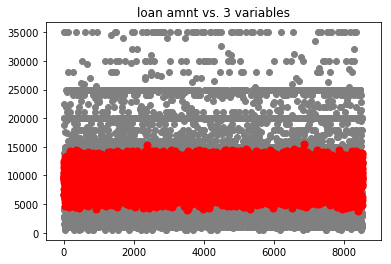

In [12]:
plt.scatter(index, actual,  color='gray')
plt.scatter(index, predicted, color='red', linewidth=2)
plt.title("loan amnt vs. 3 variables")
plt.savefig("3_variables.png")
plt.show()


In [13]:
mae = m.mean_absolute_error(actual, predicted)
mse = m.mean_squared_error(actual, predicted)
rmse = np.sqrt(mse)
score = reg.score(x_test, y_test)
print("mean absolute error: ",mae)
print("root mean squared error: ", rmse)
print(score)

mean absolute error:  5498.346633309944
root mean squared error:  6928.657047197386
0.07722977260040087


In [14]:
#regression model to determine accepted loan amount


Df = pd.DataFrame(pd.read_csv("LoanStats3a_securev1.csv"))
Df["policy_code"] = Df['policy_code'].fillna(0)
Df['policy_code'] = Df['policy_code'].astype(int)

Df['emp_length'].replace(['<','+','years','year'],'')
Df.replace(['<','+','years','year'],'')

for toRep in ['<','+','years','year']:    
   Df['emp_length']=Df['emp_length'].str.replace(toRep,'') 

Df.emp_length=pd.to_numeric(df.emp_length)

#Df['emp_length'] = Df['emp_length'].astype(int)
Df['dti'].fillna(0)
#Df['dti'] = Df['dti'].str.rstrip('%').astype('float')
for c in Df.columns:
    Df[c] = pd.to_numeric(Df[c], errors='coerce') 
Df["fico_range_avg"] = (Df["fico_range_low"] + Df["fico_range_high"])/2.0
Df["fico_range_avg"].fillna(0)
#Df = Df.loc[Df["fico_range_avg"] > 0]
Df["annual_inc"].fillna(0)
len(Df.columns.values)
Df = Df.rename(columns = {"Unnamed: 0":"Sl_No"})
#the fico scores of 0 are numerical outliers, and so are ignored


C:\Users\Naveen\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
len(Df.index.values)

42542

In [53]:
Df = Df.dropna(axis = "columns", thresh = len(Df.index) - 1)
Df = Df.dropna(axis = 0)
Df.head()
Df.to_csv("linearModel_aloan.csv")

In [54]:
Df.columns.values

array(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'annual_inc', 'dti', 'fico_range_low',
       'fico_range_high', 'revol_bal', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'last_fico_range_high', 'last_fico_range_low', 'policy_code',
       'fico_range_avg'], dtype=object)

In [77]:
#xA = Df[["fico_range_avg",'dti','emp_length', "funded_amnt", 'installment']].values.reshape(-1,5)
valuesA = ['dti', 'emp_length', 'funded_amnt', 'fico_range_avg']
xA = Df[['dti','emp_length', "funded_amnt", 'fico_range_avg']].values.reshape(-1,4)
yA = Df["loan_amnt"].values.reshape(-1, 1)
#annual income not significant factor
x_trainA, x_testA, y_trainA, y_testA = train_test_split(xA, yA, test_size = .01, random_state = 0)

In [78]:
xTrainA = []
yTrainA = []
numA = rand.randint(0, len(y_trainA) - 2, 10000) #largest sample size that reasonably works

for n in numA:
    xTrainA.append(x_trainA[n])
    yTrainA.append(y_trainA[n])
    
xTrainA = np.asarray(xTrainA)
yTrainA = np.asarray(yTrainA)

xTrainB = []
yTrainB = []
numB = rand.randint(0, len(y_trainA) - 2, 10000)

for l in numB:
    xTrainB.append(x_trainA[l])
    yTrainB.append(y_trainA[l])
    
xTrainB = np.asarray(xTrainB)
yTrainB = np.asarray(yTrainB)


In [80]:
regA = linear_model.LinearRegression().fit(xTrainA,yTrainA)
regA.intercept_
scoreA = regA.score(x_testA, y_testA)
coefA = regA.coef_.tolist()

for i in range(0,4):
    print(valuesA[i], ": ", coefA[0][i])
        

dti :  1.2405157103393922
emp_length :  7.571016280535659
funded_amnt :  1.0171710643399046
fico_range_avg :  1.7190468373053984


In [75]:
regA.predict([[1.4, 20, 1000]])
coefA

array([[ 4.15271528, 11.56348868,  1.01644572]])

In [51]:
predictedA = regA.predict(x_testA)
actualA = y_testA
print("merged score: ", score)
print("aloan score: ", scoreA)

merged score:  0.07722977260040087
aloan score:  0.9640265582619476


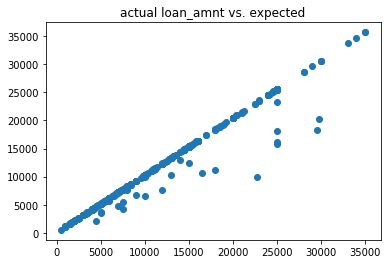

In [46]:

plt.scatter(actualA, predictedA)
plt.title("actual loan_amnt vs. expected")
plt.savefig("pred_vs_actual.png")
plt.show()

In [24]:
compareA = pd.DataFrame({"predicted": predictedA.flatten(), 'actual': actualA.flatten()})
compareA["percent difference"] = (np.sqrt((compareA["actual"] - compareA["predicted"])**2))*(100/compareA['actual'])
indexA= compareA.index.values
#compareA = compareA.sort_values(by = 'actual')
compareA.head()

,predicted,actual,percent difference
0,20551.307634,20000.0,2.756538
1,15282.761643,15000.0,1.885078
2,8711.057915,8400.0,3.703070
3,6707.527444,6600.0,1.629204
4,12172.042025,12000.0,1.433684


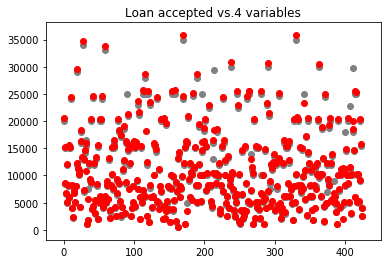

In [25]:
plt.scatter(indexA, actualA,  color='gray')
plt.scatter(indexA, predictedA, color='red')
plt.title("Loan accepted vs.4 variables")
plt.savefig("4_variables")
plt.show()

In [26]:
mae = m.mean_absolute_error(actualA, predictedA)
mse = m.mean_squared_error(actualA, predictedA)
rmse = np.sqrt(mse)
print("mean absolute error: ", mae)
print("root mean squared error: ", rmse)
print("r-squared coeffecient: ", scoreA)

mean absolute error:  501.4358005126131
root mean squared error:  1354.003761728888
r-squared coeffecient:  0.9643468534774952


In [27]:
regb = linear_model.LinearRegression().fit(xTrainB,yTrainB)
regb.coef_

array([[2.64324175, 8.17489147, 9.79586423, 1.02036848]])

In [28]:
predictedb = regb.predict(x_testA)
actualb = y_testA
regb.score(x_testA, y_testA)

0.9642310216872902

In [29]:
len(predicted)

8525

In [31]:
stuff = [[Df["fico_range_avg"][0], Df['dti'][0], Df['emp_length'][0], Df["funded_amnt"][0]]]

In [36]:
regb.predict([[805, 27.65, 10, 5000.00]])


array([[5591.99342897]])

In [37]:
regb.predict([[780, 1.4, 20, 1000]])

array([[1327.8062043]])